In [5]:
!pip install git+https://github.com/lindermanlab/ssm.git
import ssm
import numpy as np
import matplotlib.pyplot as plt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/lindermanlab/ssm.git to /tmp/pip-req-build-xlqji5h6
  Running command git clone -q https://github.com/lindermanlab/ssm.git /tmp/pip-req-build-xlqji5h6
  Created wheel for ssm: filename=ssm-0.0.1-cp37-cp37m-linux_x86_64.whl size=402691 sha256=d486a58ca9f6b9a55b0582e0a53ec9af3c3583ed5028600913fd270999052e0d
  Stored in directory: /tmp/pip-ephem-wheel-cache-2l1lvlj1/wheels/c8/04/4e/bf90d9e04d0342f45dc1103b47678ce7e7ba1dbc97d431d254
Successfully built ssm


In [6]:
# @title Figure settings
from matplotlib import rcParams

rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] = 15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True
# @title Data retrieval
import os, requests

fname = []
for j in range(3):
  fname.append('steinmetz_part%d.npz'%j)
url = ["https://osf.io/agvxh/download"]
url.append("https://osf.io/uv3mw/download")
url.append("https://osf.io/ehmw2/download")

for j in range(len(url)):
  if not os.path.isfile(fname[j]):
    try:
      r = requests.get(url[j])
    except requests.ConnectionError:
      print("!!! Failed to download data !!!")
    else:
      if r.status_code != requests.codes.ok:
        print("!!! Failed to download data !!!")
      else:
        with open(fname[j], "wb") as fid:
          fid.write(r.content)

In [7]:
# get all 39 sessions
alldat = np.array([])
for j in range(3):
  alldat = np.hstack((alldat,
                      np.load('steinmetz_part%d.npz'%j,
                              allow_pickle=True)['dat']))
                              
alldat.shape

(39,)

In [8]:
dat = alldat[11]   # a dict
print('keys:', len(dat.keys()), dat.keys())

print('')
print('mouse_name:', dat['mouse_name'])
print('date_exp:', dat['date_exp'])
print('brain_area:', dat['brain_area'].shape, np.unique(dat['brain_area']))

print('')
print('bin_size:', dat['bin_size'])
print('stim_onset:', dat['stim_onset'])
print('spks(neurons*trials*time_bins):', dat['spks'].shape, np.unique(dat['spks']))

print('')
print('gocue:', dat['gocue'].shape)
print('contrast_right:', dat['contrast_right'].shape, np.unique(dat['contrast_right']))
print('contrast_left:', dat['contrast_left'].shape, np.unique(dat['contrast_left']))
print('feedback_time:', dat['feedback_time'].shape)
print('feedback_type:', dat['feedback_type'].shape, np.unique(dat['feedback_type']))
print('response_time:', dat['response_time'].shape)
print('response:', dat['response'].shape, np.unique(dat['response']))

print('')
print('active_trials:', dat['active_trials'].shape)
print('reaction_time:', dat['reaction_time'].shape)

print('')
print('pupil:', dat['pupil'].shape)
print('wheel:', dat['wheel'].shape)

keys: 31 dict_keys(['spks', 'wheel', 'pupil', 'response', 'response_time', 'bin_size', 'stim_onset', 'contrast_right', 'contrast_left', 'brain_area', 'feedback_time', 'feedback_type', 'gocue', 'mouse_name', 'date_exp', 'trough_to_peak', 'active_trials', 'contrast_left_passive', 'contrast_right_passive', 'spks_passive', 'pupil_passive', 'wheel_passive', 'prev_reward', 'ccf', 'ccf_axes', 'cellid_orig', 'reaction_time', 'face', 'face_passive', 'licks', 'licks_passive'])

mouse_name: Lederberg
date_exp: 2017-12-05
brain_area: (698,) ['ACA' 'CA1' 'DG' 'LGd' 'LH' 'MD' 'MOs' 'PL' 'SUB' 'VISam' 'VISp' 'root']

bin_size: 0.01
stim_onset: 0.5
spks(neurons*trials*time_bins): (698, 340, 250) [0 1 2 3 4 5 6]

gocue: (340, 1)
contrast_right: (340,) [0.   0.25 0.5  1.  ]
contrast_left: (340,) [0.   0.25 0.5  1.  ]
feedback_time: (340, 1)
feedback_type: (340,) [-1.  1.]
response_time: (340, 1)
response: (340,) [-1.  0.  1.]

active_trials: (450,)
reaction_time: (340, 2)

pupil: (3, 340, 250)
wheel: (1

In [9]:
trials_count = dat['spks'].shape[1]

In [10]:
brain_areas = dat['brain_area']
bin_size = dat['bin_size']
stim_onset = dat['stim_onset']
gocue = dat['gocue'] + stim_onset
feedback_time = dat['feedback_time'] + stim_onset
response_time = dat['response_time'] + stim_onset
neural_activity = dat['spks']

# stim_onset = int(stim_onset/bin_size)
# response_time = response_time/bin_size

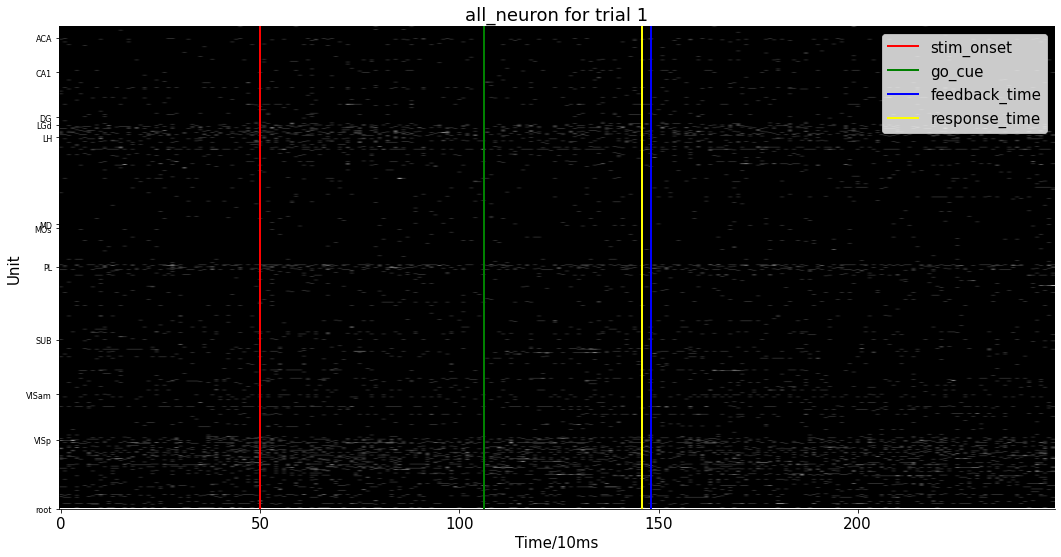

In [11]:
# Display a spike raster of the image

n_trial = 1

plt.figure(figsize=(15,8))
plt.imshow(neural_activity[:,n_trial,:], aspect='auto', cmap='gray')
#plt.axis('off')

# Label the different phases of the trial movement activity
time_bins = neural_activity.shape[2]

plt.axvline(x=stim_onset/bin_size, color='red', linewidth=2, label='stim_onset')
plt.axvline(x=gocue[n_trial]/bin_size, color='green', linewidth=2, label='go_cue')
plt.axvline(x=feedback_time[n_trial]/bin_size, color='blue', linewidth=2, label='feedback_time')
plt.axvline(x=response_time[n_trial]/bin_size, color='yellow', linewidth=2, label='response_time')
plt.ylabel("Unit")
plt.xlabel("Time/10ms")

unique, count=np.unique(brain_areas,return_counts=True)
yticklabels = unique
yticklabels_idx = np.cumsum(count)
plt.yticks(yticklabels_idx, yticklabels, fontsize=8)
plt.legend()
plt.tight_layout
plt.title(f'all_neuron for trial {n_trial}')
plt.show()

In [12]:
# Display a spike raster of the image

def raster_trial(neural_activity, n_trial, stim_onset, gocue, feedback_time, response_time, bin_size, brain_areas):

    plt.figure(figsize=(15,8))
    plt.imshow(neural_activity[:,n_trial,:], aspect='auto', cmap='gray')
    #plt.axis('off')

    # Label the different phases of the trial movement activity
    time_bins = neural_activity.shape[2]

    plt.axvline(x=stim_onset/bin_size, color='red', linewidth=2, label='stim_onset')
    plt.axvline(x=gocue[n_trial]/bin_size, color='green', linewidth=2, label='go_cue')
    plt.axvline(x=feedback_time[n_trial]/bin_size, color='blue', linewidth=2, label='feedback_time')
    plt.axvline(x=response_time[n_trial]/bin_size, color='yellow', linewidth=2, label='response_time')
    plt.ylabel("Unit")
    plt.xlabel("Time/10ms")

    num_states = 4
    num_neurons = neural_activity.shape[0]
    neural_activity_try = neural_activity[:, n_trial, :]
    test_hmm = ssm.HMM(num_states, num_neurons, observations="poisson")
    test_hmm.fit(neural_activity_try.T)
    zhat = test_hmm.most_likely_states(neural_activity_try.T)

    plt.plot(zhat/4*neural_activity.shape[0], linewidth=0.6)

    unique, count=np.unique(brain_areas,return_counts=True)
    yticklabels = unique
    yticklabels_idx = np.cumsum(count)
    plt.yticks(yticklabels_idx, yticklabels, fontsize=8)
    plt.legend()
    plt.tight_layout
    plt.title(f'all_neuron for trial {n_trial}')
    plt.show()

n_trial = 300

In [104]:
regions = ["vis ctx", "thal", "hipp", "other ctx", "midbrain", "basal ganglia", "cortical subplate", "other"]
region_colors = ['blue', 'red', 'green', 'darkblue', 'violet', 'lightblue', 'orange', 'gray']
brain_groups = [["VISa", "VISl", "VISpm", "VISrl"],  # visual cortex
                ["VPL"],#, "CL", "LD", "LGd", "LH", "LP", "MD", "MG", "PO", "POL", "PT", "RT", "SPF", "TH", "VAL", "VPM"], # thalamus
                ["CA", "CA1", "CA2", "CA3", "DG", "SUB", "POST"],  # hippocampal
                ["MOp", "MOs"],  # motor cortex
                ["RSP"],  # retrosplenial
                ["ACB", "CP", "GPe", "LS", "LSc", "LSr", "MS", "OT", "SNr", "SI"],  # basal ganglia
                ["BLA", "BMA", "EP", "EPd", "MEA"],  # cortical subplate
                ["VISp"],
                ["VISam"]
                ]

nareas = 9  # only the top 4 regions are in this particular mouse
NN = len(dat['brain_area'])  # number of neurons
barea = nareas * np.ones(NN, )  # last one is "other"
for j in range(nareas):
  barea[np.isin(dat['brain_area'], brain_groups[j])] = j  # assign a number to each region

np.unique(barea, return_counts=True)

(array([2., 3., 7., 8., 9.]), array([220,   6,  66,  79, 327]))

In [14]:
unique, count=np.unique(brain_areas,return_counts=True)
data_count=dict(zip(unique,count))
data_count
print(unique, count)

['ACA' 'CA1' 'DG' 'LGd' 'LH' 'MD' 'MOs' 'PL' 'SUB' 'VISam' 'VISp' 'root'] [ 16  50  65  11  18 126   6  56 105  79  66 100]


In [105]:
trials_count = dat['spks'].shape[1]

response = dat['response']  # right - nogo - left (-1, 0, 1)
vis_right = dat['contrast_right']  # 0 - low - high
vis_left = dat['contrast_left']  # 0 - low - high
vis_stim = vis_left - vis_right # right - nogo - left
# trials types by response
resp_left = response > 0
resp_none = response == 0
resp_right = response < 0
# trials types by visual stimuli
vis_left = vis_stim > 0
vis_none = vis_stim == 0
vis_right = vis_stim < 0
# trials types by result
correct_left = np.logical_and(vis_left > 0, response > 0)
correct_none = np.logical_and(vis_left == 0, response == 0)
correct_right = np.logical_and(resp_right, vis_right)
correct_id = np.logical_or(correct_left, correct_none)
correct_id = np.logical_or(correct_id, correct_right)
#incorrect_id = np.logical_not(correct_id)


vis_ctx_spikes = dat['spks'][barea==0]
mot_ctx_spikes = dat['spks'][barea==3]
rsp_ctx_spikes = dat['spks'][barea==4]
thal_ctx_spikes = dat['spks'][barea==1]

In [106]:
print((dat['feedback_type']==1).sum())
print(correct_id.sum())

251
249


In [107]:
chosen_idx = correct_id#correct_right

In [108]:
trials_limited = dat['spks'][barea==7]
print(trials_limited.shape)



(66, 340, 250)


In [109]:
def reshape_for_hmm(trials_data):
  num_neurons = trials_data.shape[0]
  num_trials = trials_data.shape[1]
  time_bins = trials_data.shape[2]
  return trials_data.reshape(num_neurons, num_trials*time_bins), num_neurons

In [110]:
def fit_hmm(trials_data, num_states, transition_kwargs=None):

  trials_concatenated, num_neurons = reshape_for_hmm(trials_data)
  test_hmm = ssm.HMM(num_states, num_neurons, observations="poisson",transitions="constrained", transition_kwargs = transition_kwargs)
  test_hmm.fit(trials_concatenated.T, method="em", num_iters=300, init_method ='kmeans')
  mls = test_hmm.most_likely_states(trials_concatenated.T)

  return mls

In [111]:
num_states = 3

A=np.array([[1,1,1],[1,1,0],[1,0,1]])
transition_mask = (A > 0)
transition_kwargs = {"transition_mask": transition_mask}

visp_states = fit_hmm(dat['spks'][:,chosen_idx,:][barea==7], num_states, transition_kwargs)
visam_states = fit_hmm(dat['spks'][:,chosen_idx,:][barea==8], 2)
#vpl_states = fit_hmm(dat['spks'][:,chosen_idx,:][barea==1], num_states)
#motor_states = fit_hmm(dat['spks'][:,chosen_idx,:][barea==3], num_states)


/usr/local/lib/python3.7/dist-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

In [117]:
visam_states.shape

(62250,)

In [113]:
movement = []
for idx, val in enumerate(chosen_idx):
  if val:
    movement =  np.append(movement, dat['wheel'][0][idx])

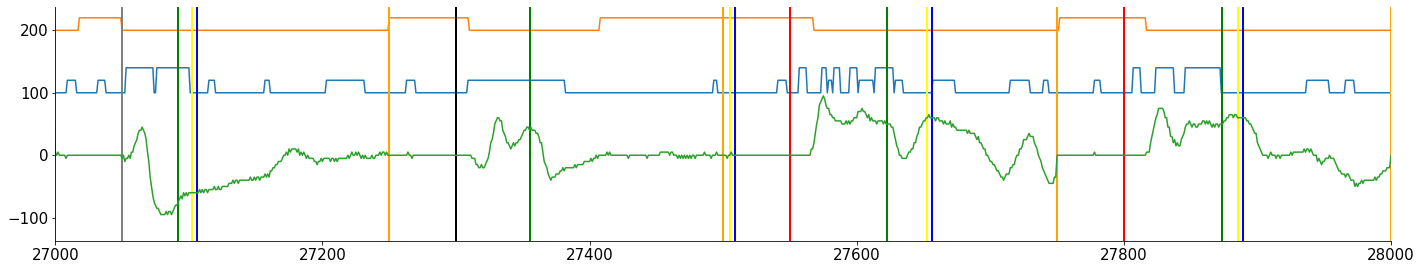

In [114]:
    time_bins_n = 250
    shift = 0
    plt.plot(visp_states*20+100)
    plt.plot(visam_states*20+200)
    for i, val in enumerate(chosen_idx):
      if val:
        plt.axvline(shift, color='orange', linewidth=2)
        stim_color = 'black'
        if vis_left[i]:
          stim_color = 'red'
        if vis_right[i]:
          stim_color = 'grey'
        plt.axvline(x=stim_onset/bin_size+shift, color=stim_color, linewidth=2, label='stim_onset')
        plt.axvline(x=gocue[i]/bin_size+shift, color='green', linewidth=2, label='go_cue')
        plt.axvline(x=feedback_time[i]/bin_size+shift, color='blue', linewidth=2, label='feedback_time')
        plt.axvline(x=response_time[i]/bin_size+shift, color='yellow', linewidth=2, label='response_time')
        shift += time_bins_n


    plt.plot(movement*5)
    plt.tight_layout
    #plt.title(f'num of states {num_states}, trial {n_trial}, area {regions[i]}')
    plt.xlim(27000, 28000)
    plt.show()

In [120]:
def get_firing_rates_for_state(neurons, states, state):
  num_neur = neurons.shape[0]
  idx = np.where(np.array(states) == state)[0][0]
  frates = np.empty((0,neurons.shape[0]))
  while idx < len(states):
    frate = np.empty((0,neurons.shape[0]))
    while idx < len(states) and states[idx] == state:
      
      frate = np.append(frate, neurons[:,idx].reshape(1, num_neur), 0)
      idx += 1
    frates = np.append(frates, frate.mean(0).reshape(1, num_neur), 0)
    while  idx < len(states) and states[idx] != state:
      idx += 1
  print(frates.shape)
  return frates
  


(442, 79)
(442, 79)


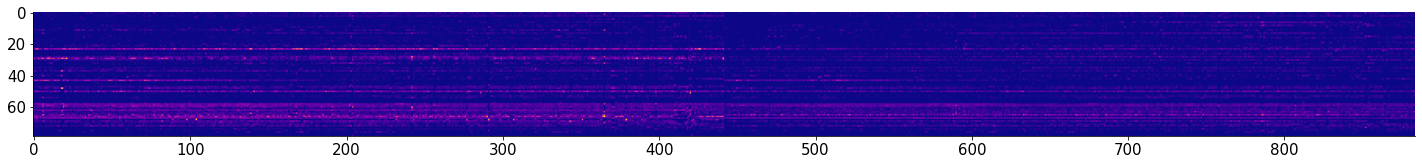

In [128]:
frates = get_firing_rates_for_state(visam_neur, visam_states, 0)
frates1 = get_firing_rates_for_state(visam_neur, visam_states, 1)
frates_all = np.append(frates,frates1,0)
#frates_all = np.append(frates_all,frates2)
plt.imshow(frates_all.T, cmap='plasma')
plt.show()

In [74]:
def get_firing_rates(neurons, states):
  for state in np.unique(states).sort():
    get_firing_rates_for_state(neurons, state)

In [119]:
visam_neur, neuron_number = reshape_for_hmm(dat['spks'][:,chosen_idx,:][barea==8])
print(visam_neur.shape)

(79, 62250)


In [80]:
tst = np.array([[1,1,1]])
tst.shape

(1, 3)

In [ ]:
  plt.tight_layout
  plt.hist(motor_states[movement>0])
  plt.show()
  plt.hist(motor_states[movement==0])
  plt.show()
  plt.hist(motor_states[movement<0])
  plt.show()

In [ ]:
learned_transition_mat = test_hmm.transitions.transition_matrix


im = plt.imshow(learned_transition_mat, cmap='gray')
plt.title("Learned Transition Matrix")


plt.show()


In [102]:
for idx,dat_ in enumerate(alldat):
  motor_neurons = len(dat_['brain_area'][dat_['brain_area'] =='MOp']) + len(dat_['brain_area'][dat_['brain_area'] =='MOs'])
  vpl_neurons = len(dat_['brain_area'][dat_['brain_area'] =='VPL'])
  visp_neurons = len(dat_['brain_area'][dat_['brain_area'] =='VISp'])
  visam_neurons = len(dat_['brain_area'][dat_['brain_area'] =='VISam'])
  if visp_neurons > 0 and visam_neurons > 0:
    print('session no: ', idx)
    print('motor neurons number:', motor_neurons)
    print('VPL ', vpl_neurons)
    print('primary visual ', visp_neurons)
    print('vis am ', visam_neurons)

session no:  2
motor neurons number: 0
VPL  0
primary visual  114
vis am  114
session no:  11
motor neurons number: 6
VPL  0
primary visual  66
vis am  79
session no:  38
motor neurons number: 54
VPL  0
primary visual  15
vis am  126
